In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as inter
import scipy.linalg as sclin

In order to derive the Karhunen-Loeve (KL) expansion we want to solve the following Fredholm integral equation,
\begin{equation}
	\int_{\mathcal{T}}K(s,t)\phi_{i}(t)dt = \lambda_{i}\phi_{i}(s)\qquad \qquad (1)
\end{equation}
where $ K(s,t) $ is the covariance kernel for $ X(s) $ and $ X(t) $.

### Integral method

In the integral method we approximate the integral by using a quadrature formula,
	$$ \int_{0}^{1}f(t)dt \approx \sum_{i = 0}^{n+1}\omega_{i}f(t_{i})  $$
where we $ 0 = t_{0} \leq t_{1} \leq \cdots\leq t_{n} \leq t_{n+1}=1 $
	
We use the $\textit{trapezium}$ scheme to approximate the integral on the LHS of (1), which is defined as follows. For $ t_{j+1} - t_{j} = h = \frac{1}{n+1}, 0\leq j\leq n $, 
	\begin{align*}
		\int_{0}^{1}f(t)dt &\approx \sum_{i = 0}^{n+1}\frac{h}{2}(f(t_{i}) + f(t_{i+1}))\\
		&= h(\frac{f(t_{0})}{2} + f(t_{1}) + \cdots + f(t_{n}) + \frac{f(t_{n+1})}{2}).
	\end{align*}
	
Applying this to equation (1) we get,
	\begin{equation}
		\int_{0}^{1}K(s,t)\phi_{i}(t)dt \approx \sum_{j}K(s,t_{j})\phi_{i}(t_{j})\omega_{j} = \lambda_{i} \phi_{i}(s) \qquad (2)
	\end{equation}
    
where
	\begin{align}
		K &=  \begin{pmatrix}
		cov(X(t_{0}),X(t_{0})) & cov(X(t_{0}),X(t_{1})) & \cdots & cov(X(t_{0}),X(t_{n+1}))\\
		cov(X(t_{1}),X(t_{0})) & cov(X(t_{1}),X(t_{1})) & \cdots & cov(X(t_{1}),X(t_{n+1}))\\
		\cdots &&&\\
		cov(X(t_{n+1}),X(t_{0})) & cov(X(t_{n+1}),X(t_{1})) & \cdots & cov(X(t_{n+1}),X(t_{n+1}))\\
		\end{pmatrix}
	\end{align}
    
   \begin{align}
		W &= \begin{pmatrix}
		\frac{1}{2(n+1)} & 0 & \cdots & 0 & 0\\
		0 & \frac{1}{(n+1)} & \cdots & 0 & 0\\
		\cdots&&&&\\
        0 & 0 & \cdots & \frac{1}{(n+1)} &0\\
		0 & 0 & \cdots &0& \frac{1}{2(n+1)}
		\end{pmatrix}
	\end{align}
	
\begin{align}
		\phi_{i}^{T} = \begin{pmatrix}
		\phi_{i}(t_{0}), & \phi_{i}(t_{1}), & \cdots , & \phi_{i}(t_{n+1}) 
		\end{pmatrix}
	\end{align}
    
   By defining $ u_{i} = W^{\frac{1}{2}}\phi_{i} $, we obtain a symmetric eigenvalue problem, $$ W^{\frac{1}{2}}KW^{\frac{1}{2}}u_{i} = \lambda_{i}u_{i} $$
	We can obtain $ \phi_{i} $ by computing the inverse transformation $ \phi_{i} = W^{-\frac{1}{2}}u_{i} $

### Numerical Computations

We use the Spectrum.hpp in mpp to compute the eigenvalues and eigenvectors of the matrix eigenvalue problem. We display some properties of the eigenvalues and plot the discretised eigenfunctions.

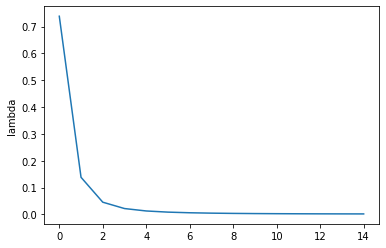

In [7]:
# the eigenvalues were computed in the mpp framework and simply copy pasted from console to produce the plot
eigenvals = np.array([0.73876919,0.1383201,0.04557059,0.02186553,0.012842421,0.0085278915,0.0061507233,0.0047106315,0.0037781452,0.0031448342,0.00269996,0.002380508,0.0021487019,0.0019810215,0.0018624823])

plt.plot(eigenvals)
plt.ylabel('lambda')
plt.show()

We observe that the eigenvalues decay to 0 very fast and hence it makes sense to use a truncated KL expansion

We plot the eigenfunctions corresponding to some of the eigenvalues

In [11]:
Dphi1 = np.array([1.27929,1.3247786,1.3085331,1.2313106,1.0967096,0.91100243,0.68284296,0.42286333,0.14317846,-0.14317846,-0.42286333,-0.68284296,-0.91100243,-1.0967096,-1.2313106,-1.3085331])
Dphi2 = np.array([1.36777,1.3467249,1.1257075,0.73753628,0.23984988,-0.29345131,-0.78317855,-1.1566133,-1.3583051,-1.3583051,-1.1566133,-0.78317855,-0.29345131,0.23984988,0.73753628,1.1257075])
Dphi3 = np.array([1.391961,1.2558931,0.72645415,-0.030524929,-0.77794299,-1.2816936,-1.3839919,-1.0527959,-0.39184302,0.39184302,1.0527959,1.3839919,1.2816936,0.77794299,0.030524929,-0.72645415])
Dphi4 = np.array([1.4013845,1.1084907,0.2217551,-0.78377944,-1.3694268,-1.2214432,-0.41910671,0.60775412,1.3090282,1.3090282,0.60775412,-0.41910671,-1.2214432,-1.3694268,-0.78377944,0.2217551])
Dphi5 = np.array([-1.4059672,-0.92034923,0.30938083,1.2889732,1.2264172,0.17228993,-1.0211356,-1.3889622,-0.63379825,0.63379825,1.3889622,1.0211356,-0.17228993,-1.2264172,-1.2889732,-0.30938083])
Dphi8 = np.array([1.4113339,0.20353066,-1.3765895,-0.43852578,1.3017296,0.6607417,-1.1889355,-0.86370275,1.0414944,1.0414944,-0.86370275,-1.1889355,0.6607417,1.3017296,-0.43852578,-1.3765895])
Dphi11 = np.array([-1.4139204,0.55681431,0.90981827,-1.3805024,0.33999548,1.0726934,-1.3111398,0.11432406,1.2076385,-1.2076385,-0.11432406,1.3111398,-1.0726934,-0.33999548,1.3805024,-0.90981827])
Dphi16 = np.array([1.432911,-1.2619075,0.93825731,-0.50111085,0.0033475265,0.49482073,-0.933133,1.2585688,-1.4317619,1.4317619,-1.2585688,0.933133,-0.49482073,-0.0033475264,0.50111085,-0.93825731])

In [16]:
#We use cubic splines to obtain a smoother plot  of the eigenfunctions
x = np.linspace(0,1,16)
phi1x = inter.CubicSpline(x, Dphi1, bc_type='natural')
phi2x = inter.CubicSpline(x, Dphi2, bc_type='natural')
phi3x = inter.CubicSpline(x, Dphi3, bc_type='natural')
phi4x = inter.CubicSpline(x, Dphi4, bc_type='natural')
phi5x = inter.CubicSpline(x, Dphi5, bc_type='natural')
phi8x = inter.CubicSpline(x, Dphi8, bc_type='natural')
phi11x = inter.CubicSpline(x, Dphi11, bc_type='natural')
phi16x = inter.CubicSpline(x, Dphi16, bc_type='natural')
x_new = np.linspace(0, 1, 100)
phi1 = phi1x(x_new)
phi2 = phi2x(x_new)
phi3 = phi3x(x_new)
phi4 = phi4x(x_new)
phi5 = phi5x(x_new)
phi8 = phi8x(x_new)
phi11 = phi11x(x_new)
phi16 = phi16x(x_new)

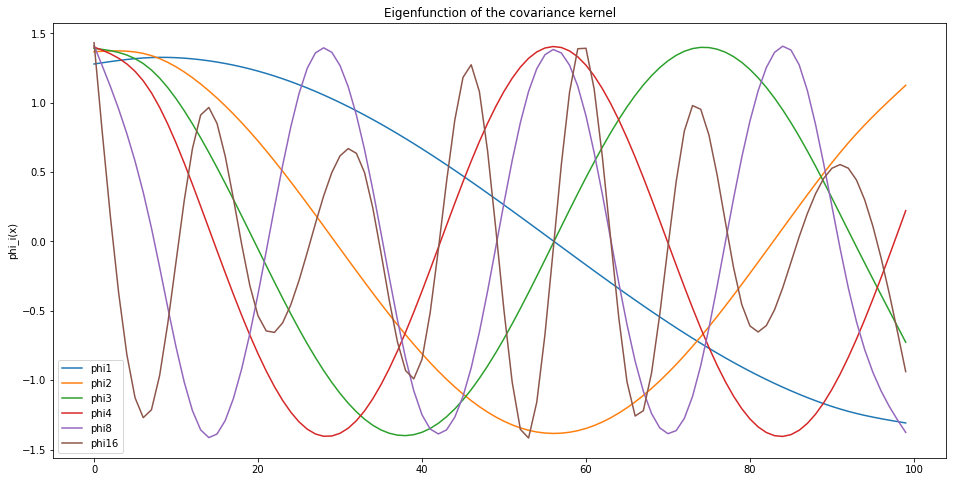

In [15]:
plt.figure(figsize=(16,8))
plt.plot(phi1, label='phi1')
plt.plot(phi2, label='phi2')
plt.plot(phi3, label='phi3')
plt.plot(phi4, label='phi4')
#plt.plot(phi5, label='phi5')
plt.plot(phi8, label='phi8')
#plt.plot(phi11, label='phi11')
plt.plot(phi16, label='phi16')
plt.ylabel('phi_i(x)')
plt.legend()
plt.title('Eigenfunction of the covariance kernel')
plt.show()

### Plotting the truncated KL expansion

Next, we plot the truncated KL expainsion which is given as,
$$ X(t) = \sum_{i=1}^{p}\sqrt{\lambda_i}\phi_i(t)\xi_i $$

In [17]:
s1 = np.array([0.016983335,0.018826821,-0.11283945,-0.3678687,-0.37984052,-0.25787041,0.22664372,0.59331256,0.51698603,0.54400642,0.68799582,0.53208503,-0.16894067,-0.046994859,-0.17793481,-0.53879926])
s2 = np.array([-0.081357076,0.271559,0.31218981,0.11382514,0.48261451,0.5670071,0.17458364,-0.08546823,-0.17146205,0.58440441,1.0319254,0.75468295,1.4290529,1.1265991,1.094873,1.2185459])
s3 = np.array([-0.20678413,-0.43365182,-0.45903707,0.22264644,0.78171664,0.54916069,0.49256752,0.26002707,-0.18819016,-0.18148374,-0.054146861,0.46095607,0.18691001,0.046365638,0.33348876,0.31415104])
s4 = np.array([-0.82169503,-0.88027019,-0.81562072,-0.43855963,0.01354944,0.46301128,0.69390788,0.44186474,0.37612156,0.82384706,0.37717915,-0.22499382,0.2398822,-0.10662363,-0.32610624,-0.17491632])
s5 = np.array([-0.8539024,-0.57249535,-0.73216454,-0.81209618,-1.0017071,-1.3867874,-1.0975508,-0.73847365,-0.72133738,-1.2811606,-1.1584947,-1.2501067,-1.2994257,-1.554914,-1.6049757,-0.80770449])
s6 = np.array([0.80246408,0.96413055,0.91015023,0.8855148,1.3532342,0.85509122,0.65904671,0.70714158,0.40756125,0.27589178,-0.61386721,-0.35228505,0.078426871,0.28902488,0.11565619,0.45444554])
s7 = np.array([-0.94284614,-0.72045568,0.27145441,0.57268267,0.24987895,0.34917784,-0.090506641,-0.07823479,-0.24197108,-0.57819223,-0.22040757,-0.3727485,-0.24706193,-0.14449764,-0.40043286,-0.31959808])
s8 = np.array([-0.75796207,-0.66217182,-0.48615556,-0.19572146,-0.30474435,-0.056011472,-0.0086063924,-0.51472491,-0.60641764,-0.54028939,-0.037171657,-0.11252079,0.40391014,0.97100216,1.3726414,1.4127174])
s9 = np.array([0.93506225,0.9112392,1.0889129,1.2797135,1.192174,0.89117836,1.1491863,0.92934048,0.80743643,1.1979839,0.24374435,0.22849954,0.012600287,-0.47857547,-0.44136037,-0.43378458])
s10 = np.array([0.58006379,0.15902403,-0.23223661,-0.26061168,0.32495981,0.54618612,-0.0071120192,-0.070204362,-0.30859979,-0.43832907,-0.46377853,-0.42511071,-0.28472923,-0.16258969,-0.34473683,-0.15296606])
s = [s1,s2,s3,s4,s5,s6,s7,s8,s9,s10]

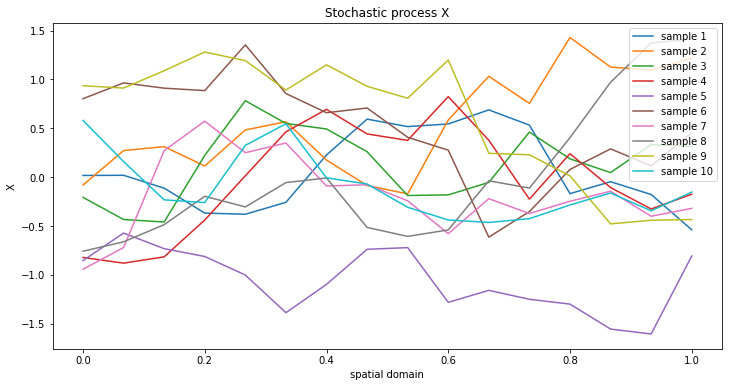

In [18]:
x = np.linspace(0,1,16)
plt.figure(figsize=(12,6))
for i in range(10):
    plt.plot(x,s[i], label='sample {}'.format(i+1))
plt.ylabel('X')
plt.xlabel('spatial domain')
plt.title('Stochastic process X')
plt.legend()
plt.show()